In [1]:
##keras and Tensorflow > 2.0

In [2]:
# Data Collection
import pandas_datareader as pdr
key = '7571138692c4583db77356edd3042058983394ee'

In [5]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

In [20]:
df.to_csv('AAPL.csv')

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('AAPL.csv')

In [23]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [25]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [27]:
# we are taking the close colume and make the future prediction

In [28]:
df1 = df.reset_index()['close']

In [30]:
df1.shape

(1258,)

In [31]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

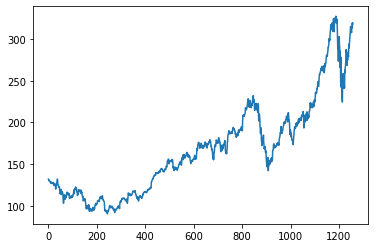

In [33]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [41]:
# LSTM are sensitive to the scale of the data. We have to use minmax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [42]:
df1.shape

(1258, 1)

In [43]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [45]:
# Time series we must divide data first and then do the preprocessing

training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1), :1]

In [46]:
training_size,test_size

(817, 441)

In [49]:
# determine the timesteps, its means how many previous days are considered for the prediction of the data
# suppose training data: 120, 130, 125, 140, 134, 150
# Time step = 3
# if Time step is three we basically have three feaures f1, f2, f3
# f1=120, f2=130, f3=125 and o/p=140
# Here in data preprocessing we are converting data into dependent and independent features based in the Time step
# To calculate the o/p i have to consider the previous three days input

    #        x_train      y_train
    #   f1    f2   f3      o/p
    #  120   130  125      140
    #  130   125  140      134
    #  125   140  134      150
    
# considering the previous i will try to train the LSTM model

# for test data set also we have to do the same
# suppose the test data: 160, 190, 154, 160, 170
    #       x_test        y_test
    #   f1    f2    f3     o/p
    #  160   190    154    160
    #  190   154    160    170

In [50]:
import numpy
# convert an array of the values in the dataset matrix

def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)
    

In [51]:
# reshape into X = t, t+1, t+2, t+3 and Y = t+4

time_step = 100
x_train,y_train= create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [52]:
print(x_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [55]:
print(x_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [56]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [57]:
# reshape input to be (samples, timestamps, features) whcih is required for the LSTM, Below features is 1
x_train  = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test  = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [59]:
# create the required LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [60]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 21s 29ms/sample - loss: 0.0178 - val_loss: 0.0543
Epoch 2/100
716/716 [==============================] - 7s 9ms/sample - loss: 0.0038 - val_loss: 0.0043
Epoch 3/100
716/716 [==============================] - 6s 8ms/sample - loss: 0.0013 - val_loss: 0.0038
Epoch 4/100
716/716 [==============================] - 7s 10ms/sample - loss: 7.8604e-04 - val_loss: 0.0052
Epoch 5/100
716/716 [==============================] - 5s 7ms/sample - loss: 6.4497e-04 - val_loss: 0.0047
Epoch 6/100
716/716 [==============================] - 7s 9ms/sample - loss: 6.0856e-04 - val_loss: 0.0044
Epoch 7/100
716/716 [==============================] - 7s 10ms/sample - loss: 6.3370e-04 - val_loss: 0.0042
Epoch 8/100
716/716 [==============================] - 6s 9ms/sample - loss: 6.0040e-04 - val_loss: 0.0037
Epoch 9/100
716/716 [==============================] - 6s 9ms/sample - loss: 5.8218e-04 - val_loss: 0.0037

In [64]:
import tensorflow as tf

In [65]:
tf.__version__

'2.0.0'

In [66]:
# lets do the prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [67]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [68]:
# calcualte RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012731878686592401

In [69]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.030516987882234482

In [70]:
# plotting 
# shift train prediction for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [71]:
#shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

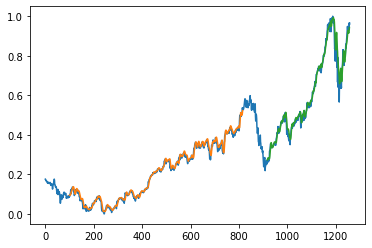

In [72]:
#plot baseline adn prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
len(test_data)

441